In [61]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [12]:
columns_name = [
    'timestamp','sex','matric_gpa_%' ,'study_year','faculty','gpa_%_2023','accommodation_status',
    'monthly_allowance','scholarship','study_hours_week','socialising_week','drinks_night',
    'classes_missed','modules_failed','in_relationship','parental_approval','relationship_parents'
]
survey_df = pd.read_csv('Stats survey.csv', names=columns_name, header=0)
survey_df.head()

,timestamp,sex,matric_gpa_%,study_year,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship,study_hours_week,socialising_week,drinks_night,classes_missed,modules_failed,in_relationship,parental_approval,relationship_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [13]:
survey_df.shape

(406, 17)

In [15]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             406 non-null    object 
 1   sex                   404 non-null    object 
 2   matric_gpa_%          399 non-null    float64
 3   study_year            333 non-null    object 
 4   faculty               399 non-null    object 
 5   gpa_%_2023            320 non-null    float64
 6   accommodation_status  383 non-null    object 
 7   monthly_allowance     375 non-null    object 
 8   scholarship           398 non-null    object 
 9   study_hours_week      403 non-null    object 
 10  socialising_week      404 non-null    object 
 11  drinks_night          404 non-null    object 
 12  classes_missed        403 non-null    object 
 13  modules_failed        403 non-null    object 
 14  in_relationship       403 non-null    object 
 15  parental_approval     4

In [16]:
survey_df["sex"].value_counts(normalize = True)

sex
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

* In the survey 53% of responders are male and 47% are female

In [20]:
table = pd.crosstab(survey_df['parental_approval'], survey_df['relationship_parents'])
table

relationship_parents,Close,Distant,Fair,Very close
parental_approval,,,,
No,18,1,9,20
Yes,79,1,25,248


Description

In [21]:
table.columns

Index(['Close', 'Distant', 'Fair', 'Very close'], dtype='object', name='relationship_parents')

<Axes: xlabel='parental_approval'>

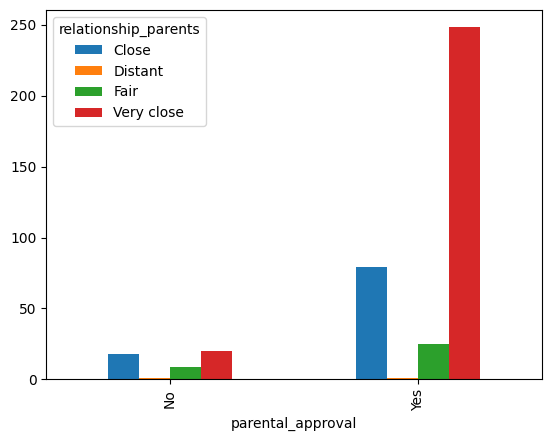

In [22]:
table.plot.bar()

<Axes: xlabel='relationship_parents', ylabel='parental_approval'>

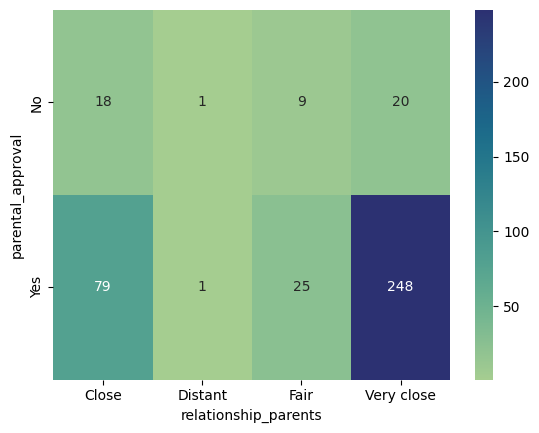

In [31]:
sns.heatmap(table, annot=True, fmt='.3g', cmap='crest')

In [32]:
survey_df.accommodation_status.value_counts()

accommodation_status
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

In [33]:
survey_df.socialising_week.value_counts()

socialising_week
Only weekends    113
1                108
2                 87
3                 63
0                 17
4+                16
Name: count, dtype: int64

In [39]:
table = pd.crosstab(survey_df['accommodation_status'], survey_df['socialising_week'])
table.T

accommodation_status,Non-private accommodation ie. Res,Private accommodation/ stay with family/friends
socialising_week,,
0,2,14
1,12,89
2,15,70
3,5,52
4+,3,13
Only weekends,11,97


In [62]:
contingency_table = pd.crosstab(survey_df['accommodation_status'], survey_df['socialising_week'])
chi2_square, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [63]:
print(chi2_square, p_value)

3.9099046455825284 0.5624591514521107


* In average, Students with Private Accomodation socialize 7 times more than students with no private accomodation

<Axes: xlabel='accommodation_status'>

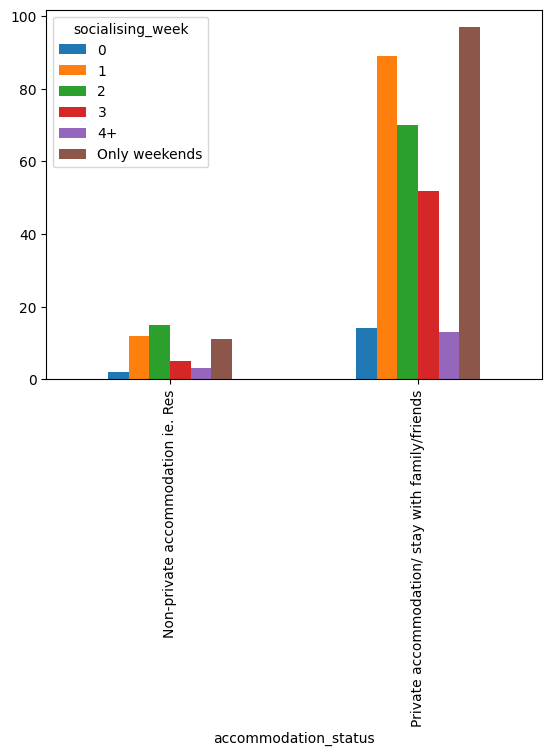

In [37]:
table.plot.bar()

## Influence of Gender on GPA

In [41]:
grouped = survey_df[['sex', 'gpa_%_2023']].groupby("sex")

In [42]:
grouped.mean()

,gpa_%_2023
sex,
Female,67.596067
Male,65.097059


<Axes: xlabel='sex'>

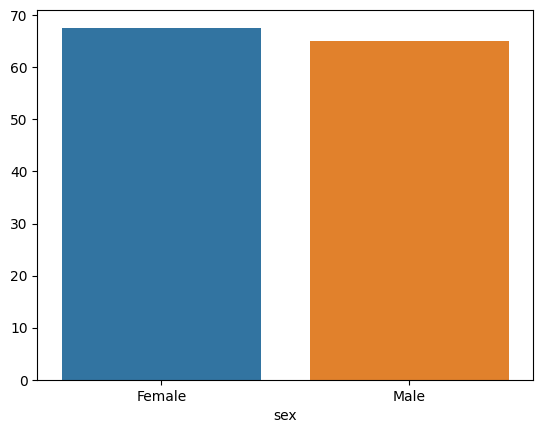

In [44]:
sns.barplot(grouped.mean().T)

<Axes: xlabel='gpa_%_2023', ylabel='sex'>

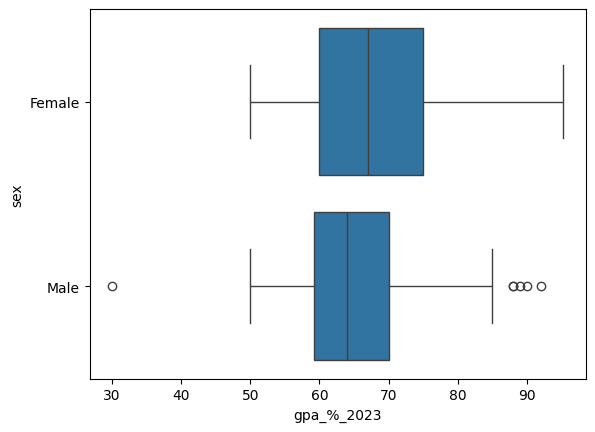

In [48]:
sns.boxplot(x='gpa_%_2023', y='sex', data=survey_df)

Description

In [51]:
survey_df[['matric_gpa_%', 'gpa_%_2023']].corr()

,matric_gpa_%,gpa_%_2023
matric_gpa_%,1.000000,0.299104
gpa_%_2023,0.299104,1.000000


* Matric GPA has a negligible influence in the GPA of 2023

In [59]:
survey_df.isna().sum()

timestamp                0
sex                      2
matric_gpa_%             7
study_year              73
faculty                  7
gpa_%_2023              86
accommodation_status    23
monthly_allowance       31
scholarship              8
study_hours_week         3
socialising_week         2
drinks_night             2
classes_missed           3
modules_failed           3
in_relationship          3
parental_approval        4
relationship_parents     3
dtype: int64

In [60]:
survey_df['study_year'].value_counts(dropna=False)

study_year
2nd Year        153
1st Year        128
NaN              73
3rd Year         40
4th Year          7
Postgraduate      5
Name: count, dtype: int64